# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration hypthese 2: The year the house was constructed has an influence on the selling price.
 * Additional variables are created or renamed and some graphical explorations are performed


##### Getting data and settings
###### Getting setting stored in 0_definitions.py file

In [16]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

##### Getting data stored at the end of EDA _4_cleaning.ipynb

In [ ]:
df_eda = pd.read_csv("eda4.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)

##### Some extra variables for EDA

##### Changing data format and building time between house being sold and constructed
##### Difference of house construction/renovation and selling

In [ ]:
df_eda.info() 
df_eda["date_sold"] = pd.to_datetime(df_eda["date_sold"])
df_eda["yr_sold"]=df_eda["date_sold"].dt.year
# Difference
df_eda["sold_build_difference"]=(df_eda["yr_sold"]-df_eda["yr_built"]) 

##### Checking for correlation between year sold year constructed and their difference 

Text(95.7222222222222, 0.5, 'Features')

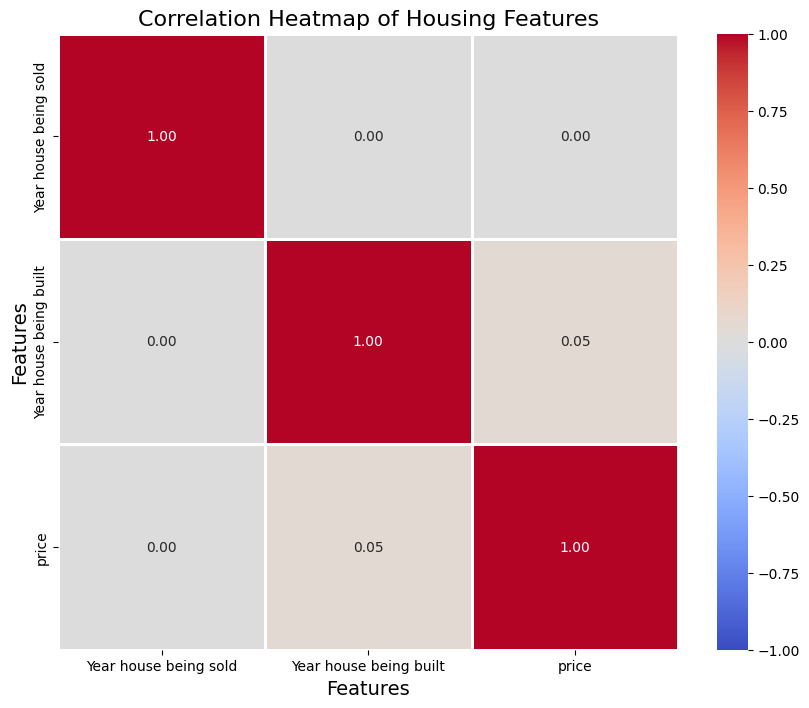

In [19]:
new_column_names = {
    'yr_sold': 'Year house being sold',
    'yr_built': 'Year house being built',
    'price': 'price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

##### keeping only rows when the house was not renovated (=yr_renovated)

In [21]:
# Number of rows before filtering
rows_before = len(df_eda)
df_eda = df_eda[df_eda['yr_renovated'] == 0]
# Number of rows after filtering
rows_after = len(df_eda)
rows_dropped = rows_before - rows_after 
rows_dropped 


632

In [23]:
df_eda['Year house being built'].describe()

count    14781.000000
mean      1972.498478
std         28.805469
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1998.000000
max       2015.000000
Name: Year house being built, dtype: float64

In [ ]:
### Check of linearity 
# Define bins and labels
bins = [1900, 1930, 1960, 1990, 2020]
labels = ['Between. 1900-1930', '1931-1960', '1961-1990', '1900-2015']
# Apply pd.cut to bin the data
df_eda['Year of counstruction'] = pd.cut(df_eda['Year house being built'], bins=bins, labels=labels)
# Display the DataFrame with the new binned column
df_eda.head()

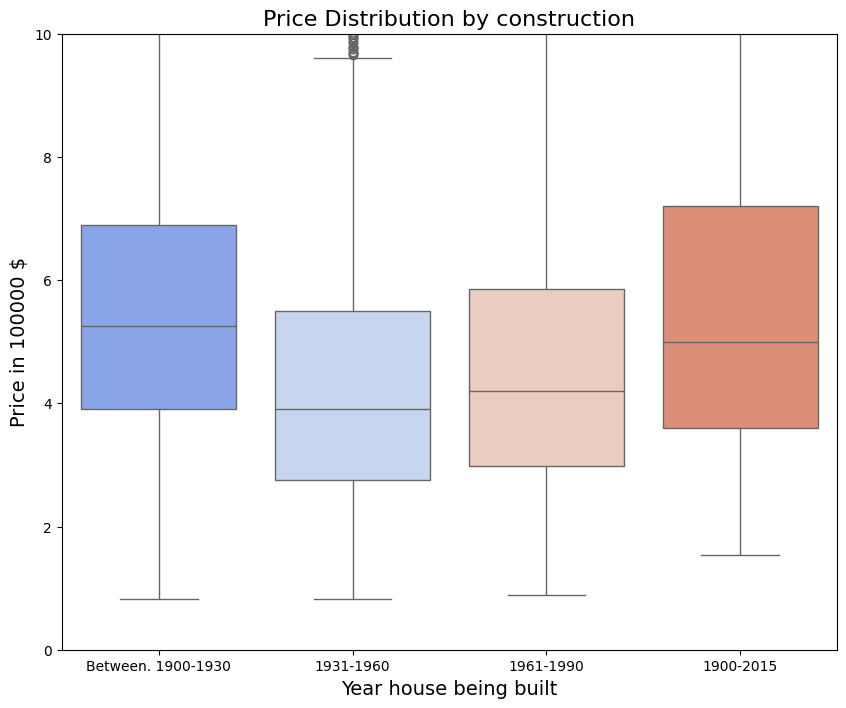

In [37]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='Year of counstruction',  # Binned categories
    y='Price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by construction', fontsize=16)  # Title with larger font size
plt.xlabel('Year house being built', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000 $', fontsize=14)                                       # Y-axis label

plt.ylim(0, 10) 
plt.show()  # Display the boxplot

### Plotting for price and living area by year being build

In [26]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14781 entries, 1 to 15412
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date_sold                           14781 non-null  datetime64[ns]
 1   Price                               14781 non-null  float64       
 2   house_id                            14781 non-null  int64         
 3   id                                  14781 non-null  int64         
 4   bedrooms                            14781 non-null  int64         
 5   bathrooms                           14781 non-null  int64         
 6   sqft_living                         14781 non-null  float64       
 7   sqft_lot                            14781 non-null  float64       
 8   floors                              14781 non-null  int64         
 9   waterfront                          14781 non-null  int64         
 10  view                       

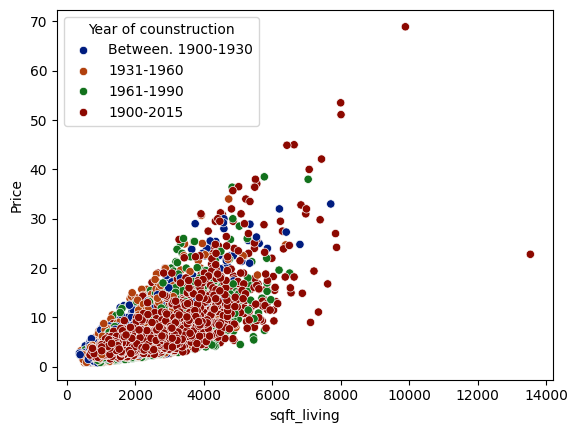

In [34]:

sns.scatterplot(data=df_eda, x='sqft_living', y='Price', 
                    hue='Year of counstruction', palette='dark');

#### Saving data for next steps

In [ ]:
df_eda.to_csv("eda5.csv")
 